In [2]:
!pip install lime

     |████████████████████████████████| 275 kB 4.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=32e08192c93214e63ee3b3ab42f041146d7a0dd9a45d741c34868b7ac5788730
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [3]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import re
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
plt.rcParams['figure.figsize'] = [5, 5]
pd.set_option('display.max_columns', None)
# model explainability use case
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix,plot_roc_curve
from lime.lime_tabular import LimeTabularExplainer
import shap
#The above packages are for data manipulation, data visualization, splitting of data, algorithm, model explainability package.

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 5.0 MB/s 


In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 5.1 MB/s 


In [4]:
#Perform EDA(Exploratory Data Analysis) and knowing our dataset

df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()
# getting the counts of each customer
for cols in df.columns:
    print('------------------------------------')
    print(df[cols].value_counts())
print('we have {} rows in our dataset'.format(df.shape[0]))
print('we have {} columns in our dataset'.format(df.shape[1]))

------------------------------------
35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
------------------------------------
No     1233
Yes     237
Name: Attrition, dtype: int64
------------------------------------
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
------------------------------------
691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64
------------------------------------
Research & Development    961
Sales                     446
Human Resources         

In [ ]:
# cleaning the data
# map them
df['Vehicle_Age'] = df['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2, '> 2 Years':3})
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1, 'No':0})
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['BusinessTravel'] = encoder.fit_transform(df['BusinessTravel'])
df['Department'] = encoder.fit_transform(df['Department'])
df['EducationField'] = encoder.fit_transform(df['EducationField'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['JobRole'] = encoder.fit_transform(df['JobRole'])
df['Over18'] = encoder.fit_transform(df['Over18'])
df['OverTime'] = encoder.fit_transform(df['OverTime'])
df['MaritalStatus'] = encoder.fit_transform(df['MaritalStatus'])
df['Attrition'] = encoder.fit_transform(df['Attrition'])

In [6]:
#Check the correlation matrix

df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,NaN,0.028062,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,NaN,0.246118,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,NaN,0.016543,-0.029377,-0.026341,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,NaN,0.009135,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,NaN,0.007481,-0.007840,-0.024604,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,NaN,0.025514,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,NaN,-0.020322,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,NaN,0.002259,-0.011214,-0.005614,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,0.017621,0.022556,0.035179,-0.006888,-0.018519,-0.010336,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,NaN,-0.024037,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


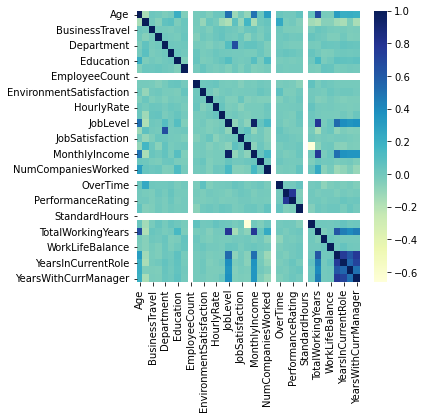

In [7]:
import seaborn as sb
from matplotlib import pyplot as plt
corr_viz = sb.heatmap(df.corr(), cmap="YlGnBu")
plt.show()

In [9]:
X = df.drop(["Attrition"], axis=1)
y = df["Attrition"]
# spliting the data to train and validation set
# train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101,stratify=y)
# shape of the data of train and validation set
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(y_test.shape))

Shape of the X_train (1102, 34)
Shape of the y_train (1102,)
Shape of the X_test (368, 34)
Shape of the y_test (368,)


In [31]:
params = {}
params["objective"] = "binary"
params['metric'] = 'auc'
params["max_depth"] = -1
params["num_leaves"] = 10
params["min_data_in_leaf"] = 20
params["learning_rate"] = 0.03
params["bagging_fraction"] = 0.9
params["feature_fraction"] = 0.35
params["feature_fraction_seed"] = 20
params["bagging_freq"] = 10
params["bagging_seed"] = 30
params["'min_child_weight'"] = 0.09
params["lambda_l1"] = 0.01
params["verbosity"] = -1
from lightgbm import LGBMClassifier # intializing the model
model = LGBMClassifier(**params)
# fitting the model
model.fit(X_train, y_train)

def model_auc(model):
    train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    val_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f'Train AUC: {train_auc}, Val Auc: {val_auc}')
# model performance
model_auc(model)

Train AUC: 0.953031519042755, Val Auc: 0.8372552246174099


AUC score of the model is 0.8372552246174099


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


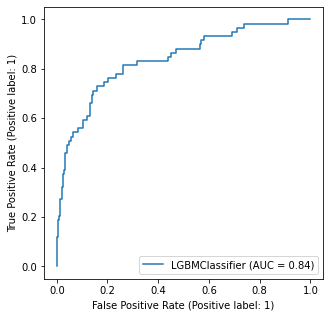

In [32]:
# predicting the likelihood for the validation set
y_pred = model.predict_proba(X_test)[:, 1]
# checking the roc_auc_curve
print('AUC score of the model is {}'.format(roc_auc_score(y_test, y_pred)))
# the visualization of roc_auc score
plot_roc_curve(model, X_test, y_test)

In [105]:
from lime.lime_tabular import LimeTabularExplainer
class_names = [0, 1]
#instantiate the explanations for the data set
limeexplainer = LimeTabularExplainer(X_test.values, class_names=class_names, feature_names = X_test.columns, discretize_continuous = True)
idx= 9 # the rows of the dataset
explainable_exp = limeexplainer.explain_instance(X_test.values[idx], model.predict_proba, num_features=3, labels=class_names)
explainable_exp.show_in_notebook(show_table=True, show_all=False)

In [111]:
y_test
count = []
tem = 0
for i in y_test:
  tem = tem + 1
  if(tem > 100):
    break
  else:
    count.append(i)
z = 0
o = 0
for i in count:
  if(i==0):
    z = z + 1
  else:
    o = o + 1
print(z)
print(o)

82
18


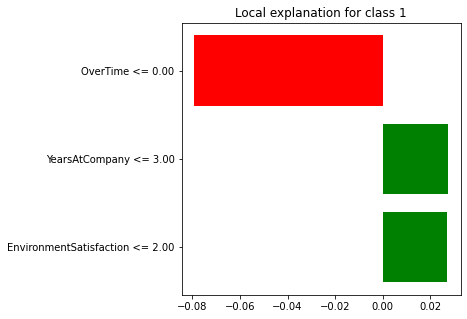

In [107]:
fig = explainable_exp.as_pyplot_figure()
fig.savefig('lime_report.jpg')

In [112]:
explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer Expected Value: {expected_value}")
idx = 100 # row selected for fast runtime
select = range(idx)
features = X_test.iloc[select]
feature_display = X.loc[features.index]
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    shap_values = explainer.shap_values(features)[1]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

Explainer Expected Value: [-1.89989349]


In [ ]:
expected_value

array([-1.89989349])

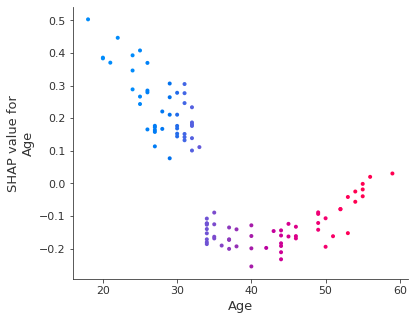

In [124]:
shap.dependence_plot(ind='Age', interaction_index='Age',
                    shap_values=shap_values, features=X_test[:idx],
                    display_features=feature_display)

In [123]:
df["Age"].value_counts()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

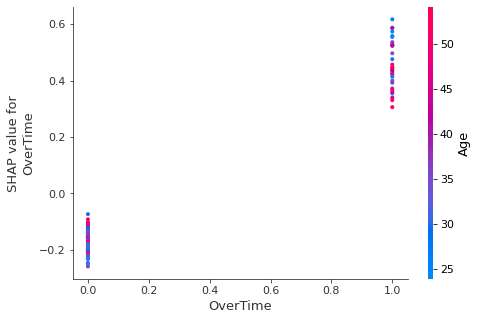

In [117]:
#Two Dependency Plot
shap.dependence_plot(ind='OverTime', interaction_index='Age',
                    shap_values=shap_values, features=X_test[:idx],
                    display_features=feature_display)



In [136]:
#Force Plot Individually
shap.initjs() # run to show the plot
shap.force_plot(explainer.expected_value, shap_values=shap_values[8,:], features=feature_display.iloc[8,:])
plt.savefig('force_plot-sample-8-no.png')

<Figure size 360x360 with 0 Axes>

In [128]:
feature_display.iloc[0,:] #Attrition - Yes (1053 - 0) #Attrition - No (2021 - 1)

Age                            26
BusinessTravel                  1
DailyRate                     342
Department                      1
DistanceFromHome                2
Education                       3
EducationField                  1
EmployeeCount                   1
EmployeeNumber               1053
EnvironmentSatisfaction         1
Gender                          1
HourlyRate                     57
JobInvolvement                  3
JobLevel                        1
JobRole                         6
JobSatisfaction                 1
MaritalStatus                   1
MonthlyIncome                2042
MonthlyRate                 15346
NumCompaniesWorked              6
Over18                          0
OverTime                        1
PercentSalaryHike              14
PerformanceRating               3
RelationshipSatisfaction        2
StandardHours                  80
StockOptionLevel                1
TotalWorkingYears               6
TrainingTimesLastYear           2
WorkLifeBalanc

In [ ]:
sum = 0
for i in y_test:
  sum = sum + 1
  print("Index:",sum, "-", i)

In [ ]:
#Multiple Force Plot
shap.initjs() # run to show the plot
shap.force_plot(explainer.expected_value, shap_values, feature_display)

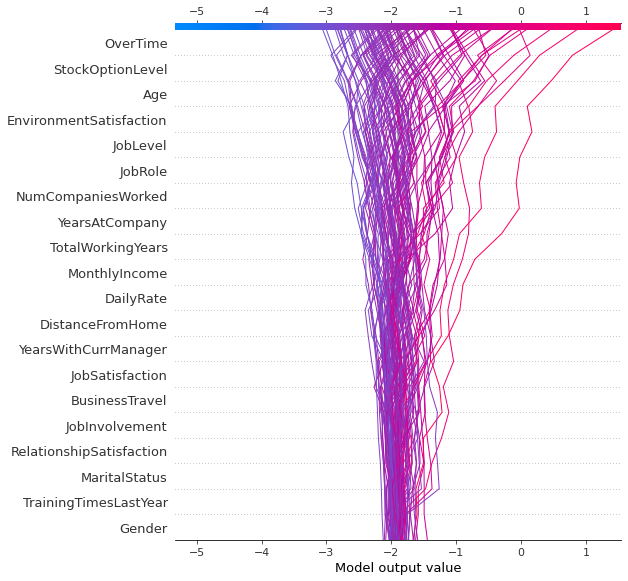

In [ ]:
 #Decision Plot
shap.decision_plot(expected_value, shap_values, features)

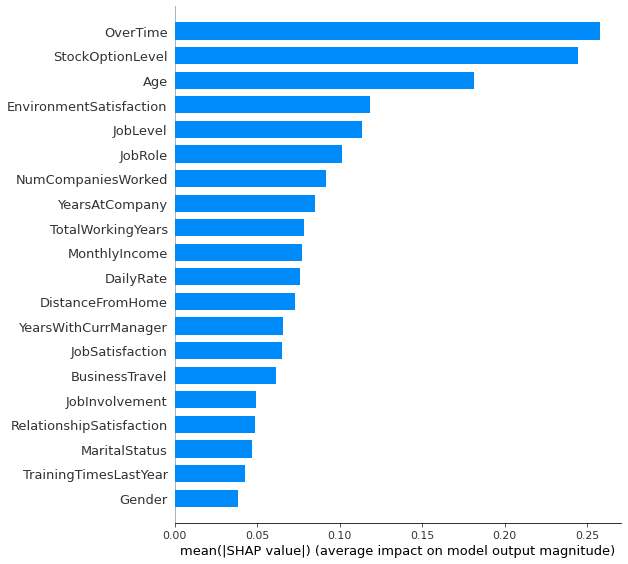

In [137]:
shap.summary_plot(shap_values, feature_display, plot_type='bar')

In [ ]:
#Force Plot Individually
shap.initjs() # run to show the plot
shap.force_plot(explainer.expected_value, shap_values=shap_values[21,:], features=feature_display.iloc[21,:])

In [ ]:
shap_values

array([[ 2.85020481e-01,  1.14023498e-01,  1.06065781e-01, ...,
         9.26708604e-04, -1.30292094e-02, -5.61994191e-02],
       [ 3.70577252e-01, -2.15879723e-02,  7.49860447e-02, ...,
        -1.64990344e-02, -2.77108072e-02, -7.72649405e-02],
       [-1.98020730e-01, -1.34762640e-02,  1.23179924e-01, ...,
        -1.91378708e-04,  4.74093001e-02, -7.41426010e-02],
       ...,
       [-1.93314249e-01,  1.26139632e-01,  5.72083169e-02, ...,
         6.12374593e-03, -8.25867578e-03, -2.23003517e-02],
       [ 1.11356401e-01, -1.16883926e-02,  1.25358128e-01, ...,
        -1.85961451e-02, -3.49242708e-02, -3.30888621e-02],
       [-1.40106224e-01,  1.81211364e-01, -5.89212242e-02, ...,
         2.60818622e-03, -2.63483036e-02, -2.17771610e-02]])

In [ ]:
y_test.shape

(368,)

In [ ]:
y_pred.shape

(368,)

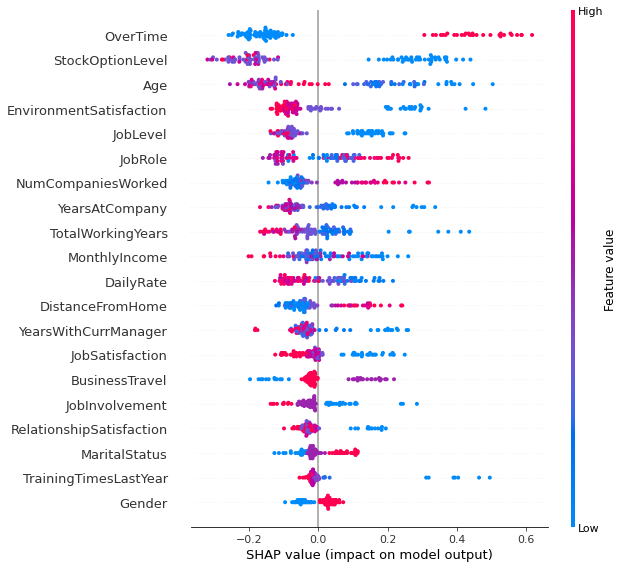

In [141]:
shap.summary_plot(shap_values, features)

In [ ]:
https://christophm.github.io/interpretable-ml-book/shap.html